- Remove non alphanumeric characters for simple training

In [144]:
from transformer import Transformer # this is the transformer.py file
import torch
import numpy as np

In [145]:
pwd

'/home/rohitk/DLNLP/Translation'

In [146]:
english_file = '../Datasets/Nepali/train.en' # replace this path with appropriate one
nepali_file = '../Datasets/Nepali/train.ne' # replace this path with appropriate one
with open(english_file, 'r') as file:
    english_sentences = file.readlines()
with open(nepali_file, 'r') as file:
    nepali_sentences = file.readlines()

# # Limit Number of sentences
# TOTAL_SENTENCES = 200000

# english_sentences = english_sentences[:TOTAL_SENTENCES]
# nepali_sentences = nepali_sentences[:TOTAL_SENTENCES]
english_sentences = [sentence.rstrip('\n').lower() for sentence in english_sentences]
nepali_sentences = [sentence.rstrip('\n') for sentence in nepali_sentences]

In [147]:
english_sentences[:5]

['it happened after the death of saul, when david was returned from the slaughter of the amalekites, and david had stayed two days in ziklag;',
 'it happened on the third day, that behold, a man came out of the camp from saul, with his clothes torn, and earth on his head: and so it was, when he came to david, that he fell to the earth, and showed respect.',
 'david said to him, "where do you come from?" he said to him, "i have escaped out of the camp of israel."',
 'david said to him, "how did it go? please tell me." he answered, "the people have fled from the battle, and many of the people also have fallen and are dead; and saul and jonathan his son are dead also."',
 'david said to the young man who told him, "how do you know that saul and jonathan his son are dead?"']

In [148]:
nepali_sentences[:5]

['दाऊदले अमालेकीहरूलाई हराएर पछि सिकलग गए। यो शाऊलको मृत्यु भएको केही दिन पछिको कुरा हो। दाऊद त्यहाँ दुइ दिन बसे।',
 'तब तेस्रो दिनमा एउटा जवान सैनिक सिकलगमा आयो। त्यो मानिस शाऊलको छाउनीबाट आएको थियो। त्यसका लुगाहरू च्यतिएको र शिरमा मैला लागेको थियो। त्यसले दाऊदको अघि धोप्टो परेर उनलाई सम्मान गर्न दण्डवत् गर्यो।',
 'दाऊदले त्यसलाई सोधे, “तिमी कहाँबाट आयौ?” त्यस मानिसले जवाफ दियो, “म इस्राएली पालबाट आउँदैछु।”',
 'दाऊदले भने, “मलाई भन, के भयो?” त्यसले भन्यो, “हाम्रा सबै सैनिकहरू भागे। धेरै मानिसहरू मारिए। शाऊल र तिनका छोरा जोनाथन पनि मरे।”',
 'दाऊदले त्यस सैनिकलाई भने, “तिमीले कसरी जान्यौ शाऊल र जोनाथन मरेको कुरा?”']

In [149]:
len(english_sentences), len(nepali_sentences)

(151937, 151937)

In [150]:
nep_vocab_set = set()
for sentence in nepali_sentences:
    for token in list(set(sentence)):
        nep_vocab_set.add(token)
nep_vocab_list = list(nep_vocab_set)
nep_vocab_list.sort()
print(nep_vocab_list)

['\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '¡', '¢', '£', '¦', '¨', '©', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', 'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'Ă', 'ă', 'Ş', 'ş', 'Ţ', 'ţ', 'Μ', 'ά', 'η', 'θ', 'π', 'ρ', 'ς', 'τ', 'М',

In [151]:
en_vocab_set = set()
for sentence in english_sentences:
    for token in list(set(sentence)):
        en_vocab_set.add(token)
en_vocab_list = list(en_vocab_set)
en_vocab_list.sort()
print(en_vocab_list)

['\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '\xa0', '¡', '¢', '£', '¦', '¨', '©', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'ă', 'č', 'ō', 'ő', 'œ', 'ř', 'ş', 'š', 'ţ', '˜', 'ά', 'α', 'β', 'η', 'θ', 'μ', 'π', 'ρ', 'ς', 'τ', 'а', 'в', 'е', 'з', 'и', 'к', 'л', 'м', 'н', 'р', 'т', 'у', 'ц', 'ч', 'ш', 'ر', 'ع', 'م', 'ُ', 'इ', 'घ', 'ट', 'त', 'ल', 'ा', 'े', '\u200b', '\u200e', '‐', '–', '—', '―', '‘', '’', '‚', '“', '”', '•', '…', '\u202a', '\u202c', '‰', '‹', '›', '⁄',

In [152]:
unfilterd_nep_vocab = ['\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                       ':', ';', '<', '=', '>', '?', '@', 
                       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
                       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
                       'U', 'V', 'W', 'X', 'Y', 'Z', 
                       '[', '\\', ']', '^', '_', '`', 
                       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
                       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 
                       'u', 'v', 'w', 'x', 'y', 'z', 
                       '{', '|', '}', '~', '\xa0', '¡', '¢', '£', '¦', '¨', 
                       '©', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', 
                       '¸', '¹', 'º', '»', '¼', '½', '¾', 
                       'À', 'Á', 'Â', 'Ã', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Ë', 'Ì', 'Í', 'Î', 'Ï', 
                       'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ù', 'Ú', 'Û', 'Ü', 'Ý', 'Þ', 'ß', 
                       'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 
                       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'Ă', 'ă', 'Ş', 'ş',
                       'Ţ', 'ţ', 'Μ', 'ά', 'η', 'θ', 'π', 'ρ', 'ς', 'τ', 'М', 'а', 'в', 'е', 'з', 'и', 'к', 'л', 
                       'н', 'р', 'т', 'у', 'ц', 'ч', 'ш', 'ا', 'ب', 'د', 'ر', 'م', 'ن', 'ه', 'و', 'ی', 'ँ', 'ं', 'ः', 
                       'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ऒ', 'ओ', 'औ', 
                       'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 
                       'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 
                       'व', 'श', 'ष', 'स', 'ह', 
                       '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 
                      'ॐ', '॒', '॔', 'ड़', 'ॠ', '।', '॥', 
                      '०', '१', '२', '३', '४', '५', '६', '७', '८', '९', '॰', 
                      '\u200c', '\u200d', '\u200e', '‐', '–', '—', '‘', '’', '“', '”', '•', '…', '\u202a', '\u202c', 
                      '‰', '‹', '›', '⁄', '₪', '₫', '€', '™', '→', '▽', '☺', '♫', '⚡', '✨', '「', '」', 'い', 'う',
                      'さ', 'た', 'ち', 'っ', 'な', 'に', 'の', 'め', 'ゃ', 'よ', 'れ', 'を', 'ん', 'ア', 'オ', 'キ', 'ネ',
                      'ノ', 'ラ', '一', '三', '不', '世', '京', '人', '住', '便', '公', '力', '営', '地', '坊', '型', '大', 
                      '宅', '害', '弾', '戦', '所', '新', '族', '暴', '材', '東', '次', '汚', '浄', '溜', '災', '爆', '界', 
                      '禾', '秒', '第', '者', '肥', '能', '走', '超', '逸', '離', '️', 
                      '\ufeff', '🇯', '🇵', '🌍', '🎥', '💦', '😃', '🙂', '🤔']


unfilterd_eng_vocab = ['\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 
                       '[', '\\', ']', '^', '_', '`', 
                       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
                       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 
                       'u', 'v', 'w', 'x', 'y', 'z', 
                       '{', '|', '}', '~', '\xa0', '¡', '¢', '£', '¦', '¨', '©', 'ª', '«', '¬', '®', 
                       '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 
                       'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 
                       'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'ă', 'č', 
                       'ō', 'ő', 'œ', 'ř', 'ş', 'š', 'ţ', '˜', 'ά', 'α', 'β', 'η', 'θ', 'μ', 'π', 'ρ', 'ς', 
                       'τ', 'а', 'в', 'е', 'з', 'и', 'к', 'л', 'м', 'н', 'р', 'т', 'у', 'ц', 'ч', 'ш', 'ر', 
                       'ع', 'م', 'ُ', 'इ', 'घ', 'ट', 'त', 'ल', 'ा', 'े', '\u200b', '\u200e', '‐', '–', '—', '―', 
                       '‘', '’', '‚', '“', '”', '•', '…', '\u202a', '\u202c', '‰', '‹', '›', '⁄', '₪', '₫', '€', 
                       '™', '→', '∞', '∶', '▽', '☺', '♣', '♥', '♫', '⚡', '「', '」', 
                       'い', 'う', 'お', 'さ', 'じ', 'た', 'ち', 'っ', 'な', 'に', 'の', 'め', 'ゃ', 'ょ', 'よ', 
                       'れ', 'を', 'ん', 'ア', 'キ', 'ラ', '一', '三', '不', '世', '人', '住', '便', '公', '営', 
                       '地', '坊', '型', '大', '宅', '害', '弾', '戦', '所', '新', '材', '次', '汚', '浄', '溜', 
                       '災', '爆', '界', '禾', '秒', '第', '肥', '逸', '離', '️', '\ufeff', '！', 'ﾉ', '�', 
                       '🎂', '🏻', '🐘', '🐦', '👏', '💦', '🗣', '😃', '😍', '🙏', '🤔', '🤳', '🥳']


# Pre-processing
- Removing other languages scripts in dataset (EN, Chinese, etc.)
- Removing emoji characters


In [153]:
# Removing unknown char, other laguage char, emoji
# This will help toremove other language sentences.
# Adding special tokens
START_TOKEN = '<START>'
PADDING_TOKEN = '<PADDING>'
END_TOKEN = '<END>'
nepali_vocabulary = [START_TOKEN, '\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
                       ':', ';', '<', '=', '>', '?', '@', 
                       '[', '\\', ']', '^', '_', '`', 
                       '{', '|', '}', '‐', '–', '—', '―', 
                       '‘', '’', '‚', '“', '”',
                       'ँ', 'ं', 'ः', 
                       'अ', 'आ', 'इ', 'ई', 'उ', 'ऊ', 'ऋ', 'ए', 'ऐ', 'ऒ', 'ओ', 'औ', 
                       'क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 
                       'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ऱ', 'ल', 'ळ', 
                       'व', 'श', 'ष', 'स', 'ह', 
                       '़', 'ऽ', 'ा', 'ि', 'ी', 'ु', 'ू', 'ृ', 'े', 'ै', 'ॉ', 'ॊ', 'ो', 'ौ', '्', 
                      'ॐ', '॒', '॔', 'ड़', 'ॠ', '।', '॥', 
                      '०', '१', '२', '३', '४', '५', '६', '७', '८', '९', '॰', 
                      '‹', '›', '⁄', PADDING_TOKEN, END_TOKEN]


english_vocabulary = [START_TOKEN,'\t', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', 
                       '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 
                       '[', '\\', ']', '^', '_', '`',
                       'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 
                       'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 
                       'U', 'V', 'W', 'X', 'Y', 'Z', 
                       'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 
                       'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 
                       'u', 'v', 'w', 'x', 'y', 'z', 
                       '{', '|', '}', '‐', '–', '—', '―', 
                       '‘', '’', '‚', '“', '”',
                       '‹', '›', '⁄',PADDING_TOKEN, END_TOKEN]


In [154]:
# Assumption: In nepali all the translation can be done using the following characters
# Fails when we have emails : 'sahil15rohit88@gmail.com' it won't be translated as we will be filtering out

In [155]:
index_to_nepali = {k:v for k,v in enumerate(nepali_vocabulary)}
nepali_to_index = {v:k for k,v in enumerate(nepali_vocabulary)}
index_to_english = {k:v for k,v in enumerate(english_vocabulary)}
english_to_index = {v:k for k,v in enumerate(english_vocabulary)}

In [156]:
len(nepali_vocabulary), len(english_vocabulary)

(141, 110)

In [157]:
import numpy as np
PERCENTILE = 95
print( f"{PERCENTILE}th percentile length Nepali: {np.percentile([len(x) for x in nepali_sentences], PERCENTILE)}" )
print( f"{PERCENTILE}th percentile length English: {np.percentile([len(x) for x in english_sentences], PERCENTILE)}" )


95th percentile length Nepali: 232.0
95th percentile length English: 223.0


In [158]:
len(nepali_sentences)

151937

In [159]:
max_sequence_length = 256

def is_valid_tokens(sentence, vocab):
    for token in list(set(sentence)):
        if token not in vocab:
            return False
    return True

def is_valid_length(sentence, max_sequence_length):
    return len(list(sentence)) < (max_sequence_length - 1) # need to re-add the end token so leaving 1 space

valid_sentence_indicies = []

for index in range(len(nepali_sentences)):
    nepali_sentence, english_sentence = nepali_sentences[index], english_sentences[index]
    if is_valid_length(nepali_sentence, max_sequence_length) \
      and is_valid_length(english_sentence, max_sequence_length) \
      and is_valid_tokens(nepali_sentence, nepali_vocabulary) and is_valid_tokens(english_sentence, english_vocabulary):
        valid_sentence_indicies.append(index)

print(f"Number of sentences: {len(nepali_sentences)}")
print(f"Number of valid sentences: {len(valid_sentence_indicies)}")

Number of sentences: 151937
Number of valid sentences: 132091


In [160]:
nepali_sentences = [nepali_sentences[i] for i in valid_sentence_indicies]
english_sentences = [english_sentences[i] for i in valid_sentence_indicies]

In [161]:
nepali_sentences[:3]

['दाऊदले अमालेकीहरूलाई हराएर पछि सिकलग गए। यो शाऊलको मृत्यु भएको केही दिन पछिको कुरा हो। दाऊद त्यहाँ दुइ दिन बसे।',
 'तब तेस्रो दिनमा एउटा जवान सैनिक सिकलगमा आयो। त्यो मानिस शाऊलको छाउनीबाट आएको थियो। त्यसका लुगाहरू च्यतिएको र शिरमा मैला लागेको थियो। त्यसले दाऊदको अघि धोप्टो परेर उनलाई सम्मान गर्न दण्डवत् गर्यो।',
 'दाऊदले त्यसलाई सोधे, “तिमी कहाँबाट आयौ?” त्यस मानिसले जवाफ दियो, “म इस्राएली पालबाट आउँदैछु।”']

In [163]:
import torch

d_model = 512
ffn_hidden = 2048
num_heads = 8
drop_prob = 0.1
num_layers = 2
max_sequence_length = 256
ne_vocab_size = len(nepali_vocabulary)

transformer = Transformer(d_model, 
                          ffn_hidden,
                          num_heads, 
                          drop_prob, 
                          num_layers, 
                          max_sequence_length,
                          ne_vocab_size,
                          english_to_index,
                          nepali_to_index,
                          START_TOKEN, 
                          END_TOKEN, 
                          PADDING_TOKEN)

In [164]:
transformer

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(110, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadA

In [165]:
from torch.utils.data import Dataset, DataLoader

class TextDataset(Dataset):

    def __init__(self, english_sentences, nepali_sentences):
        self.english_sentences = english_sentences
        self.nepali_sentences = nepali_sentences

    def __len__(self):
        return len(self.english_sentences)

    def __getitem__(self, idx):
        return self.english_sentences[idx], self.nepali_sentences[idx]

In [166]:
# Train Test Split
train_size = int(0.8 * len(english_sentences))
print(f"Train size: {train_size}")
print(f"Test size: {len(english_sentences) - train_size}")
train_english_sentences = english_sentences[:train_size]
train_nepali_sentences = nepali_sentences[:train_size]
test_english_sentences = english_sentences[train_size:]
test_nepali_sentences = nepali_sentences[train_size:]

Train size: 105672
Test size: 26419


In [167]:
train_dataset = TextDataset(train_english_sentences, train_nepali_sentences)
test_dataset = TextDataset(test_english_sentences, test_nepali_sentences)
len(train_dataset), len(test_dataset)

(105672, 26419)

In [168]:
train_dataset[1], test_dataset[1]

(('it happened on the third day, that behold, a man came out of the camp from saul, with his clothes torn, and earth on his head: and so it was, when he came to david, that he fell to the earth, and showed respect.',
  'तब तेस्रो दिनमा एउटा जवान सैनिक सिकलगमा आयो। त्यो मानिस शाऊलको छाउनीबाट आएको थियो। त्यसका लुगाहरू च्यतिएको र शिरमा मैला लागेको थियो। त्यसले दाऊदको अघि धोप्टो परेर उनलाई सम्मान गर्न दण्डवत् गर्यो।'),
 ('between 2006, the bimstec member countries have already reached an agreement to the free trade sector.',
  'बिमस्टेक सदस्य राष्ट्रबीच सन् २००६देखि स्वतन्त्र व्यापार क्ष्ँेत्रमा जाने सम्झौता भइसकेको छ ।'))

In [179]:
batch_size=64
train_loader = DataLoader(train_dataset, batch_size)
iterator = iter(train_loader)

In [180]:
for batch_num, batch in enumerate(iterator):
    print(batch)
    if batch_num > 3:
        break

[('it happened after the death of saul, when david was returned from the slaughter of the amalekites, and david had stayed two days in ziklag;', 'it happened on the third day, that behold, a man came out of the camp from saul, with his clothes torn, and earth on his head: and so it was, when he came to david, that he fell to the earth, and showed respect.', 'david said to him, "where do you come from?" he said to him, "i have escaped out of the camp of israel."', 'david said to him, "how did it go? please tell me." he answered, "the people have fled from the battle, and many of the people also have fallen and are dead; and saul and jonathan his son are dead also."', 'david said to the young man who told him, "how do you know that saul and jonathan his son are dead?"', 'the young man who told him said, "as i happened by chance on mount gilboa, behold, saul was leaning on his spear; and behold, the chariots and the horsemen followed hard after him.', "when he looked behind him, he saw me

In [181]:
from torch import nn

criterian = nn.CrossEntropyLoss(ignore_index=nepali_to_index[PADDING_TOKEN],
                                reduction='none')

# When computing the loss, we are ignoring cases when the label is the padding token
for params in transformer.parameters():
    if params.dim() > 1:
        nn.init.xavier_uniform_(params)

optim = torch.optim.Adam(transformer.parameters(), lr=1e-4)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


In [182]:
NEG_INFTY = -1e9

def create_masks(eng_batch, ne_batch):
    num_sentences = len(eng_batch)
    look_ahead_mask = torch.full([max_sequence_length, max_sequence_length] , True)
    look_ahead_mask = torch.triu(look_ahead_mask, diagonal=1)
    encoder_padding_mask = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_self_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)
    decoder_padding_mask_cross_attention = torch.full([num_sentences, max_sequence_length, max_sequence_length] , False)

    for idx in range(num_sentences):
      eng_sentence_length, ne_sentence_length = len(eng_batch[idx]), len(ne_batch[idx])
      eng_chars_to_padding_mask = np.arange(eng_sentence_length + 1, max_sequence_length)
      ne_chars_to_padding_mask = np.arange(ne_sentence_length + 1, max_sequence_length)
      encoder_padding_mask[idx, :, eng_chars_to_padding_mask] = True
      encoder_padding_mask[idx, eng_chars_to_padding_mask, :] = True
      decoder_padding_mask_self_attention[idx, :, ne_chars_to_padding_mask] = True
      decoder_padding_mask_self_attention[idx, ne_chars_to_padding_mask, :] = True
      decoder_padding_mask_cross_attention[idx, :, eng_chars_to_padding_mask] = True
      decoder_padding_mask_cross_attention[idx, ne_chars_to_padding_mask, :] = True

    encoder_self_attention_mask = torch.where(encoder_padding_mask, NEG_INFTY, 0)
    decoder_self_attention_mask =  torch.where(look_ahead_mask + decoder_padding_mask_self_attention, NEG_INFTY, 0)
    decoder_cross_attention_mask = torch.where(decoder_padding_mask_cross_attention, NEG_INFTY, 0)
    return encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask

Modify mask such that the padding tokens cannot look ahead.
In Encoder, tokens before it should be -1e9 while tokens after it should be -inf.
 

Note the target mask starts with 2 rows of non masked items: https://github.com/SamLynnEvans/Transformer/blob/master/Beam.py#L55


In [183]:
from tqdm.auto import tqdm

In [199]:
# Hyper Paramenters
num_epochs = 20

In [201]:
transformer.train()
transformer.to(device)
total_loss = 0
LOSS = []
print(f"EVAL SENTENCE: I like to eat mango")

for epoch in tqdm(range(num_epochs)):
    TOTAL_LOSS = 0
    iterator = iter(train_loader)
    for batch_num, batch in enumerate(iterator):
        transformer.train()
        eng_batch, ne_batch = batch
        encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask = create_masks(eng_batch, ne_batch)
        
        optim.zero_grad()
        
        ne_predictions = transformer(eng_batch,
                                     ne_batch,
                                     encoder_self_attention_mask.to(device), 
                                     decoder_self_attention_mask.to(device), 
                                     decoder_cross_attention_mask.to(device),
                                     enc_start_token=False,
                                     enc_end_token=False,
                                     dec_start_token=True,
                                     dec_end_token=True)
        
        labels = transformer.decoder.sentence_embedding.batch_tokenize(ne_batch, start_token=False, end_token=True)
        loss = criterian(ne_predictions.view(-1, ne_vocab_size).to(device),labels.view(-1).to(device)).to(device)

        valid_indicies = torch.where(labels.view(-1) == nepali_to_index[PADDING_TOKEN], False, True)

        loss = loss.sum() / valid_indicies.sum()
        TOTAL_LOSS += loss
        loss.backward()
        optim.step()
        #train_losses.append(loss.item())

        if batch_num % 100 == 0:
            ne_sentence_predicted = torch.argmax(ne_predictions[0], axis=1)
            predicted_sentence = ""
            for idx in ne_sentence_predicted:
              if idx == nepali_to_index[END_TOKEN]:
                break
              predicted_sentence += index_to_nepali[idx.item()]
            
            transformer.eval()
            ne_sentence = ("",)
            eng_sentence = ("I like to eat mango",)
            for word_counter in range(max_sequence_length):
                encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, ne_sentence)
                predictions = transformer(eng_sentence,
                                          ne_sentence,
                                          encoder_self_attention_mask.to(device), 
                                          decoder_self_attention_mask.to(device), 
                                          decoder_cross_attention_mask.to(device),
                                          enc_start_token=False,
                                          enc_end_token=False,
                                          dec_start_token=True,
                                          dec_end_token=False)
                next_token_prob_distribution = predictions[0][word_counter] # not actual probs
                next_token_index = torch.argmax(next_token_prob_distribution).item()
                next_token = index_to_nepali[next_token_index]
                ne_sentence = (ne_sentence[0] + next_token, )
                if next_token == END_TOKEN:
                  break
            print(f"EPOCH: {epoch} BATCH: {batch_num} LOSS: {loss.item()}")
            print(f"English:            {eng_batch[0]}")
            print(f"Nepali Translation: {ne_batch[0]}")
            print(f"Nepali Prediction:  {predicted_sentence}")
            print(f"Eval translation:   {ne_sentence}")
            print("=====================================================================================================")
    LOSS.append(TOTAL_LOSS.item())
  

EVAL SENTENCE: I like to eat mango


  0%|          | 0/20 [00:00<?, ?it/s]

EPOCH: 0 BATCH: 0 LOSS: 1.8889460563659668
English:            it happened after the death of saul, when david was returned from the slaughter of the amalekites, and david had stayed two days in ziklag;
Nepali Translation: दाऊदले अमालेकीहरूलाई हराएर पछि सिकलग गए। यो शाऊलको मृत्यु भएको केही दिन पछिको कुरा हो। दाऊद त्यहाँ दुइ दिन बसे।
Nepali Prediction:  याजदले सनेने ा रू ेई साेएक स्ि पाका ागरक तसजसुखल ा सात्यु पएको बानी कानेप्ि ् साना सु 
Eval translation:   ('खान गर्ने काम गर्नुहोस्<END>',)
EPOCH: 0 BATCH: 100 LOSS: 1.1661834716796875
English:            you called in trouble, and i delivered you. i answered you in the secret place of thunder. i tested you at the waters of meribah." selah.
Nepali Translation: तिम्रा मानिसहरू संकटमा थिए। तिनीहरूले गुहार माँगे र मैले मुक्त पारें। तुफान बोकेको बादलहरूमा म लुकिरहेको थिएँ। त्यहीबाट मैले जवाफ दिएँ, मैले तिनीहरूलाई मरीबाको पानीद्वारा जाँच गरे।”
Nepali Prediction:  तपमीरो पानिसहरूलममसटहा पुएँ तिनीहरूले मरणोर गानग् त माले ताख्त गार्र। तपलीनागाल

Text(0.5, 1.0, 'Loss vs Epochs')

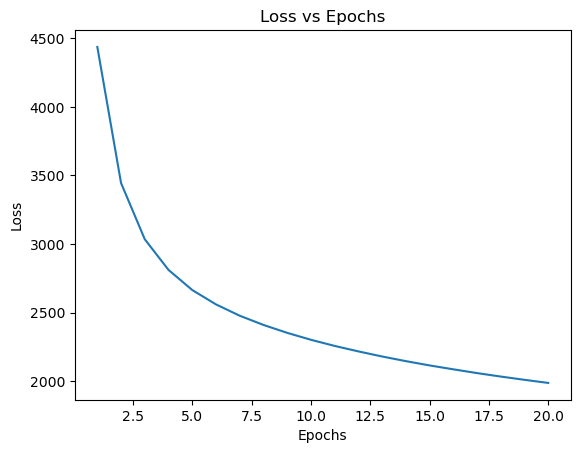

In [200]:
# plot loss graph
import matplotlib.pyplot as plt
x = np.arange(1, num_epochs+1)
y = LOSS
plt.plot(x, y)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')



In [143]:
# Run when cuda runs out of memory
# import gc

# torch.cuda.empty_cache()
# gc.collect()
# torch.cuda.empty_cache()

# !nvidia-smi

Sun Nov 12 15:46:04 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 495.29.05    CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:1B:00.0 Off |                  N/A |
|  0%   52C    P2    54W / 350W |   3369MiB / 24267MiB |     98%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:B1:00.0 Off |                  N/A |
|  0%   

In [203]:
# Saving the model
FILE_PATH = "transformer_en_to_ne_20epoch.pt"
torch.save(transformer.state_dict(), FILE_PATH)

## Inference

In [228]:
transformer = Transformer(d_model, 
                                ffn_hidden,
                                num_heads, 
                                drop_prob, 
                                num_layers, 
                                max_sequence_length,
                                ne_vocab_size,
                                english_to_index,
                                nepali_to_index,
                                START_TOKEN, 
                                END_TOKEN, 
                                PADDING_TOKEN).to(device)
transformer.load_state_dict(torch.load(FILE_PATH))
transformer.eval()

Transformer(
  (encoder): Encoder(
    (sentence_embedding): SentenceEmbedding(
      (embedding): Embedding(110, 512)
      (position_encoder): PositionalEncoding()
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): SequentialEncoder(
      (0): EncoderLayer(
        (attention): MultiHeadAttention(
          (qkv_layer): Linear(in_features=512, out_features=1536, bias=True)
          (linear_layer): Linear(in_features=512, out_features=512, bias=True)
        )
        (norm1): LayerNormalization()
        (dropout1): Dropout(p=0.1, inplace=False)
        (ffn): PositionwiseFeedForward(
          (linear1): Linear(in_features=512, out_features=2048, bias=True)
          (linear2): Linear(in_features=2048, out_features=512, bias=True)
          (relu): ReLU()
          (dropout): Dropout(p=0.1, inplace=False)
        )
        (norm2): LayerNormalization()
        (dropout2): Dropout(p=0.1, inplace=False)
      )
      (1): EncoderLayer(
        (attention): MultiHeadA

In [229]:
next(transformer.parameters()).device

device(type='cuda', index=0)

In [230]:
transformer.eval()
def translate(eng_sentence):
  eng_sentence = (eng_sentence,)
  ne_sentence = ("",)
  for word_counter in range(max_sequence_length):
    encoder_self_attention_mask, decoder_self_attention_mask, decoder_cross_attention_mask= create_masks(eng_sentence, ne_sentence)
    predictions = transformer(eng_sentence,
                              ne_sentence,
                              encoder_self_attention_mask.to(device), 
                              decoder_self_attention_mask.to(device), 
                              decoder_cross_attention_mask.to(device),
                              enc_start_token=False,
                              enc_end_token=False,
                              dec_start_token=True,
                              dec_end_token=False)
    next_token_prob_distribution = predictions[0][word_counter]
    next_token_index = torch.argmax(next_token_prob_distribution).item()
    next_token = index_to_nepali[next_token_index]
    ne_sentence = (ne_sentence[0] + next_token, )
    if next_token == END_TOKEN:
      break
  return ne_sentence[0]

In [231]:
device

device(type='cuda')

In [232]:
# loaded_transformer
translation = translate("what should we do when the day starts?")
print(translation)


के कसरी के कस्तो के कसरी के गर्ने के गर्ने ?<END>


In [ ]:
translation = translate("why care about this?")
print(translation)

In [236]:
translation = translate("This organization is very good.")
print(translation)

यो संस्थान गर्ने कार्यक्रम छ ।<END>


The translation : "This is very unusual"

In [241]:
translation = translate("what should we do?")
print(translation)

कस्तो के कसरी के हो ?<END>


In [244]:
translation = translate("Development Office")
print(translation)

विकासको स्वास्थ्य स्वीकार गर्नुहोस्<END>


In [246]:
# Almost Correct
translation = translate("This office focus on development")
print(translation)

विकासको सम्पन्न गर्ने कार्यालय सम्पन्न<END>


In [245]:
translation = translate("i am well.")
print(translation)

म मलाई मार्ग छु ।<END>
